# Adaline - Adaptive Linear Neuron

The Adaline works by minimizing the mean squared errors of the predictions of a linear function. That is the learning procedure is based on the outcome of a linear function rather than the outcome of a threashold function as in the perceptron. 

## Activation function

$$
h(x) = \sum_{i = 0}^N w_i x_i = w^T x
$$

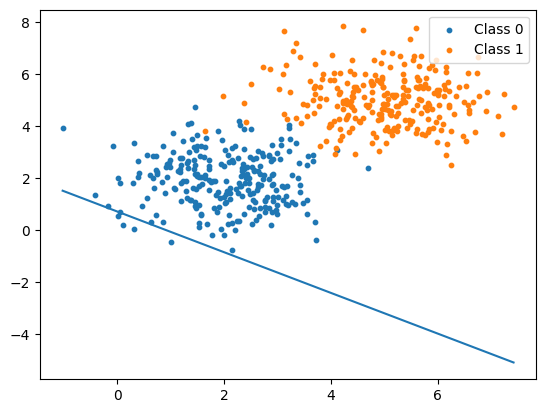

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[2, 2], [5, 5]]
n_samples = 512
n_classes = len(centers)
seed = 123
np.random.seed(seed)    

data, labels = make_blobs(n_samples=n_samples, centers=centers, random_state=1337)

fig, ax = plt.subplots()

for n_class in range(n_classes):
    ax.scatter(
        data[labels == n_class, 0],
        data[labels == n_class, 1],
        s=10,
        label=f"Class {n_class}",
    )

ax.legend(loc="upper right")


x_linspace = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)

w = np.random.uniform(low= -1, high= 1, size=3)

intercept = - w[0]/w[2]
slope = -w[1]/w[2]

boundary = slope * x_linspace + intercept

ax.plot(x_linspace, boundary, label="Initial boundary")

Number of epochs: 1000
Final weights: [-1.33102864  0.19794128  0.21433799]
Final error: 58.800396967794015


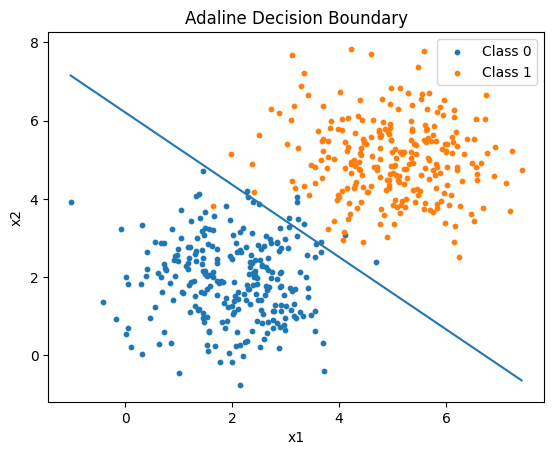

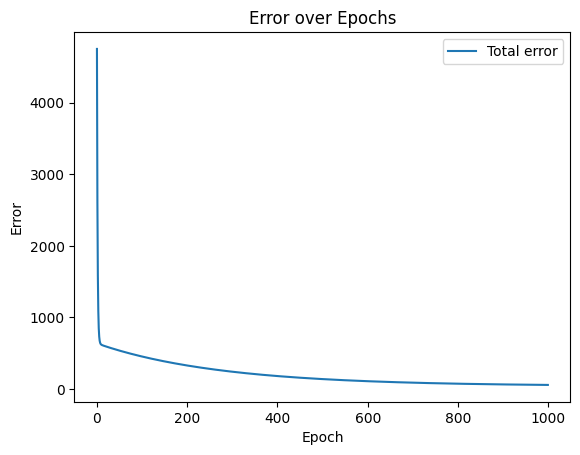

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def error_sse(errors):
    return np.sum(np.square(errors)) / 2

# Initialize variables
eta = 1e-2
epoch = 0
max_epoch = 1000
total_error = np.zeros(max_epoch)
n_samples = data.shape[0]  # Assuming data is already defined
w = np.random.randn(3)     # Initialize weights including bias
X = np.hstack((np.ones((n_samples, 1)), data))  # Add bias term
Y = np.where(labels == 0, -1, 1)

# Training loop
while epoch < max_epoch:
    adaline_output = X @ w
    errors = Y - adaline_output
    total_error[epoch] = error_sse(errors)
    # Check if the stopping condition is met
    if total_error[epoch] < 1e-5:  # Example stopping criterion
        break
    else:
        delta_w = eta * (X.T @ errors) / n_samples
        w += delta_w
    epoch += 1

# Print final results
print(f"Number of epochs: {epoch}")
print(f"Final weights: {w}")
print(f"Final error: {total_error[epoch-1]}")

# Plot data points and decision boundary
fig, ax = plt.subplots()
n_classes = np.unique(labels).size
for n_class in range(n_classes):
    ax.scatter(
        data[labels == n_class, 0],
        data[labels == n_class, 1],
        s=10,
        label=f"Class {n_class}",
    )

ax.legend(loc="upper right")

slope = -w[1] / w[2]
intercept = -w[0] / w[2]
x_linspace = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100)
boundary = slope * x_linspace + intercept
ax.plot(x_linspace, boundary, label="Final boundary")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Adaline Decision Boundary')

# Plot the total error over epochs
fig, ax = plt.subplots()
ax.plot(range(epoch), total_error[:epoch], label="Total error")
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.set_title('Error over Epochs')
ax.legend()
plt.show()
